# Project 4: PDEs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
import copy as cp

In [2]:
import itertools

In [12]:
from google.colab import files

In [3]:
from mpl_toolkits import mplot3d

In [4]:
plt.rcParams.update({'font.size': 16})

## **1. Laplace equation** 
Consider the two-dimensional setup of a square box with a side
length of L, where the top edge is set to a potential of 100 V
and the other three edges are grounded, i.e. at a potential of
zero. Your task is to find the potential within the box, where
it solves the Laplace equation
$$ \Delta \phi (x, y)  =0 $$

### **a)** 
Write a program that computes the potential $\phi(x, y)$ within the box with a discretisation length of $\Delta x = L/100$. Implement the Jacobi, Gauß–Seidel and SOR methods. As a stopping criterion, assert that the error of the discretised Laplace equation is smaller than $\epsilon_{max} = 10^{−3} V$ everywhere. The
error is defined as $\epsilon_{i,j} = |\phi_{i,j} −(\phi_{i+1,j} +\phi_{i−1,j} +\phi_{i,j+1} +\phi_{i,j−1})/4|$. Plot the average and maximum error versus the number of iterations for all algorithms. For SOR, use four different over-relaxation parameter values $\alpha = 0.5, 1.0, 1.25, 1.5, 1.75$ and 1.99. Check if it still converges for $\alpha \geq 2.0$. Discuss your results. (6 points)

In [5]:
def epsilon(N):
  eps = np.ones((N, N))
  eps[:, 0] = 0
  eps[:, -1] = 0
  eps[0, :] = 0
  eps[-1, :] = 0
  return eps

# Jacobi
def Jacobi1(p_old, N, tol_max, k):
  eps = epsilon(N)
  print(eps)
  tol = np.full((N, N), tol_max)
  print(tol)
  mean_e = []
  max_e = []

  count = 0
  p = cp.deepcopy(p_old)

  # for l in range(50000):
  while np.any(eps > tol):
    # print(l)

    for i in range(1, N-1):
      for j in range(1, N-1):
        p[i,j]  =  0.25 * (p_old[i+1,j] + p_old[i-1,j] + p_old[i,j+1] + p_old[i,j-1])
        eps[i,j] = np.abs(p[i, j] - p_old[i, j])

    p_old = cp.deepcopy(p)
    
    mean_e.append(np.mean(eps))
    max_e.append(np.amax(eps))
    count += 1
    # if count%k == 0:
    #   if np.any(eps < tol):
    #     break
    
  return p, count, mean_e, max_e

# Jacobi
def Jacobi(p_old, N, tol_max, k):
  eps = epsilon(N)
  #print(eps)
  tol = np.full((N, N), tol_max)
  #print(tol)
  mean_e = []
  max_e = []

  count = 0
  p = cp.deepcopy(p_old)

  for l in range(50000):
      # print(l)
    for i in range(1, N-1):
      for j in range(1, N-1):
        p[i,j]  =  0.25 * (p_old[i+1,j] + p_old[i-1,j] + p_old[i,j+1] + p_old[i,j-1])
        eps[i,j] = np.abs(p[i, j] - p_old[i, j])

    p_old = cp.deepcopy(p)
    
    mean_e.append(np.mean(eps))
    max_e.append(np.amax(eps))
    count += 1
    if count%k == 0:
      if np.all(eps <= tol):
        print(np.all(eps <= tol))
        break
    
  return p, count, mean_e, max_e

# Gauss-Seidel
def GS(p_old, N, tol_max, k):
  eps = epsilon(N)
  tol = np.full((N, N), tol_max)
  mean_e = []
  max_e = []

  count = 0
  p = cp.deepcopy(p_old)

  for l in range(50000):
    for i in range(1, N-1):
      for j in range(1, N-1):
        p_prev = p[i,j]
        p[i,j]  =  0.25 * (p[i+1,j] + p[i-1,j] + p[i,j+1] + p[i,j-1])
        eps[i,j] = np.abs(p[i, j] - p_prev)

    mean_e.append(np.mean(eps))
    max_e.append(np.amax(eps))
    count += 1
    if count%k == 0:
      if np.all(eps <= tol):
        break
    
  return p, count, mean_e, max_e

# SOR
def SOR(p_old, N, tol_max, alpha, k):
  eps = epsilon(N)
  tol = np.full((N, N), tol_max)
  mean_e = []
  max_e = []

  count = 0
  p = cp.deepcopy(p_old)

  for l in range(50000):
    for i in range(1, N-1):
      for j in range(1, N-1):
        p_prev = p[i,j]
        r =  0.25 * (p[i+1,j] + p[i-1,j] + p[i,j+1] + p[i,j-1]) - p[i, j]
        p[i, j] = p[i, j] + alpha*r
        eps[i,j] = np.abs(p[i, j] - p_prev)

    mean_e.append(np.mean(eps))
    max_e.append(np.amax(eps))
    count += 1
    if count%k == 0:
      if np.all(eps <= tol):
        break
    
  return p, count, mean_e, max_e

In [15]:
# Plot solution
def graphSolution(u, x, y, zaxis):
    X,Y = np.meshgrid(x, y)
    light = LightSource(180, 45)
    illuminated_surface = light.shade(u, cmap=cm.coolwarm)
    fig = plt.figure(figsize=(10, 13))
    ax0 = fig.add_subplot(211, projection='3d')
    ax0.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis',   edgecolor='none')#linewidth=0, antialiased=False, facecolors=illuminated_surface)
    ax0.set_xlabel('x')
    ax0.set_ylabel('y')
    ax0.set_zlabel(zaxis)
    #ax0.set_title('Solution u(x,y)')
    ax0.view_init(45, 45)
    ax1 = fig.add_subplot(212)
    graph1 = ax1.imshow(u, cmap='viridis',  aspect='equal', origin='lower',
                        interpolation='bilinear', extent=[min(x), max(x), min(y), max(y)]) #coolwarm
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(zaxis)
    ax1.set_xlim(min(x), max(x))
    ax1.set_ylim(min(y), max(y))
    fig.colorbar(graph1, ax=ax1)
    plt.tight_layout()
    plt.savefig("fig.png")
    files.download("fig.png")
    plt.show()

In [7]:
# parameters
N_max = 100
dx = 1
L = N_max*dx

# error tolerance
tol_max = 1e-3

#check at
k = 10

In [95]:
# potential grid initialization with BC
# np.random.seed(1)
# V = np.random.uniform(0,99,(N_max, N_max))

V = np.zeros((N_max, N_max))
#BC
V[:, 0] = 100 # left side   x=0 
V[0, :] = 0 # bottom side y=0
V[:, -1] = 0 # right side  x=100
V[-1, :] = 0  # top side    y=100

In [79]:
V

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [80]:
# Jacobi
V_J1, count_J1, mean_e_J1, max_e_J1 = Jacobi(V, N_max, tol_max, k)

True


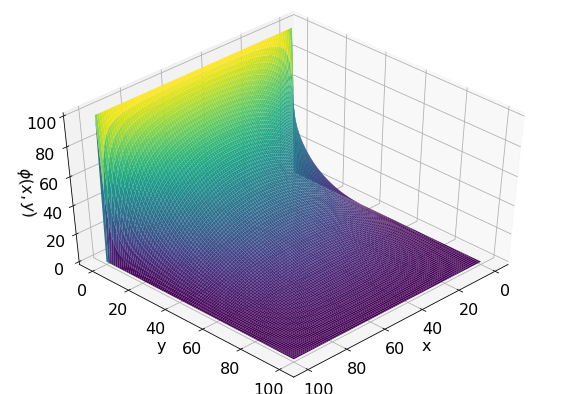

In [11]:
x = np.linspace(0, L, N_max)
y = np.linspace(0, L, N_max)

X, Y = np.meshgrid(x, y)

# graphSolution(V_GS, x, y)
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, V_J1, rstride=1, cstride=1,  cmap='viridis',   edgecolor='none')
#ax.plot_surface(Y,X,potential,shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi(x, y)$');
ax.view_init(45, 45)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

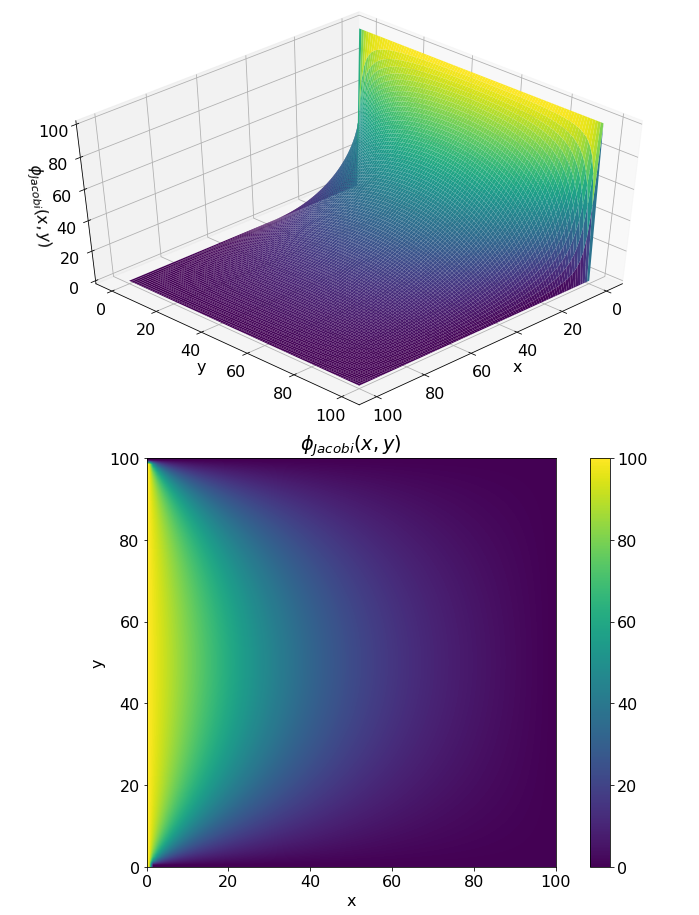

In [81]:
graphSolution(V_J1, x, y, zaxis = '$\phi_{Jacobi}(x, y)$')

In [96]:
# GS
V_GS, count_GS, mean_e_GS, max_e_GS = GS(V, N_max, tol_max, k)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

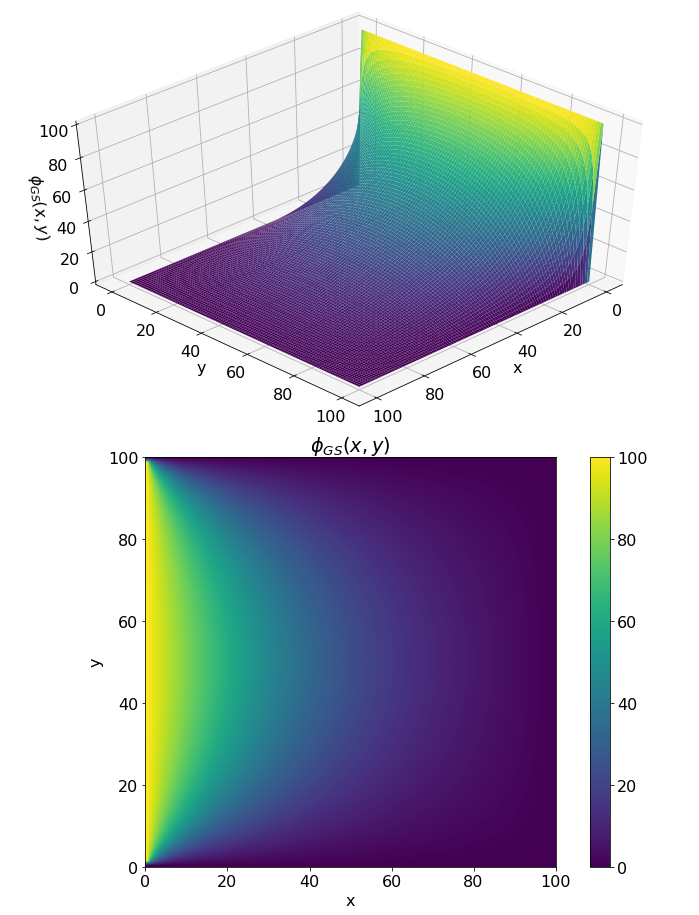

In [97]:
graphSolution(V_GS, x, y,  zaxis = '$\phi_{GS}(x, y)$')

In [20]:
alpha = [0.5, 1.0, 1.25, 1.5, 1.75, 1.99]

In [21]:
#SOR
V_SOR = []
count_SOR = []
mean_e_SOR = []
max_e_SOR = []

for a in alpha:
  V_SOR_i, count_SOR_i, mean_e_SOR_i, max_e_SOR_i = SOR(V, N_max, tol_max, a, k)
  print(a)
  V_SOR.append(V_SOR_i)
  count_SOR.append(count_SOR_i)
  mean_e_SOR.append(mean_e_SOR_i)
  max_e_SOR.append(max_e_SOR_i)

0.5
1.0
1.25
1.5
1.75
1.99


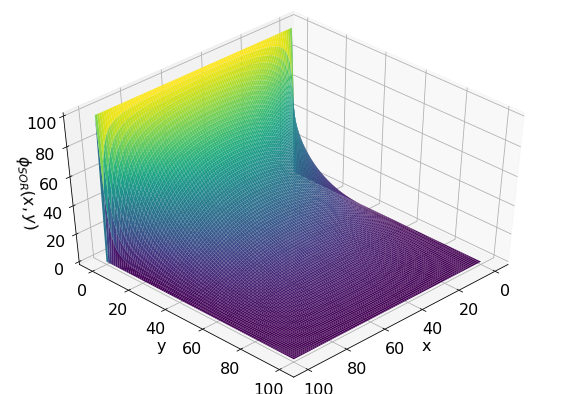

In [23]:
x = np.linspace(0, L, N_max)
y = np.linspace(0, L, N_max)

X, Y = np.meshgrid(x, y)

# graphSolution(V_GS, x, y)
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, V_SOR[0], rstride=1, cstride=1,  cmap='viridis',   edgecolor='none')
#ax.plot_surface(Y,X,potential,shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi_{SOR}(x, y)$');
ax.view_init(45, 45)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

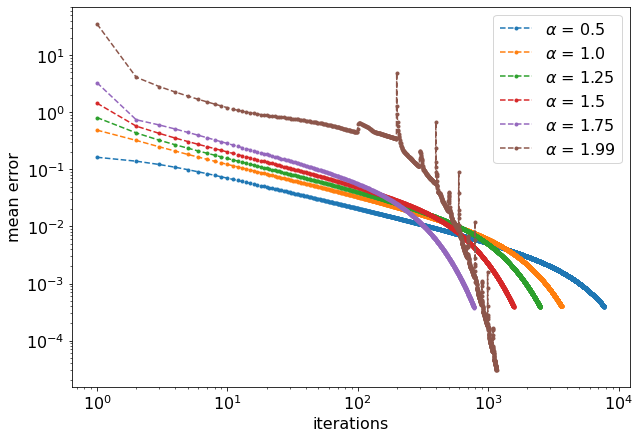

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(len(alpha)):
  iter_SOR = np.arange(1, count_SOR[i] + 1)
  plt.plot(iter_SOR, mean_e_SOR[i], '.--', label = r'$\alpha$ ' f'= {alpha[i]}')
  
plt.loglog()
# plt.semilogy()
plt.xlabel('iterations')
plt.ylabel('mean error')
plt.legend()
plt.savefig("fig1_SOR_mean.png")
files.download("fig1_SOR_mean.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

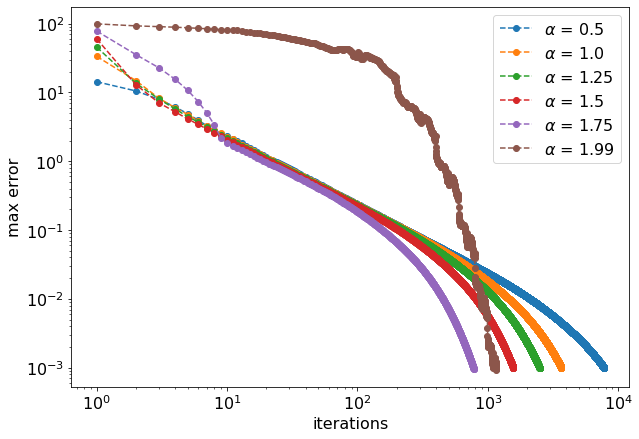

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))
for i in range(len(alpha)):
  iter_SOR = np.arange(1, count_SOR[i] + 1)
  plt.plot(iter_SOR, max_e_SOR[i], 'o--', label = r'$\alpha$ ' f'= {alpha[i]}')

plt.loglog()
# plt.semilogy()
plt.legend()
plt.xlabel('iterations')
plt.ylabel('max error')
plt.savefig("fig1_SOR_max.png")
files.download("fig1_SOR_max.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

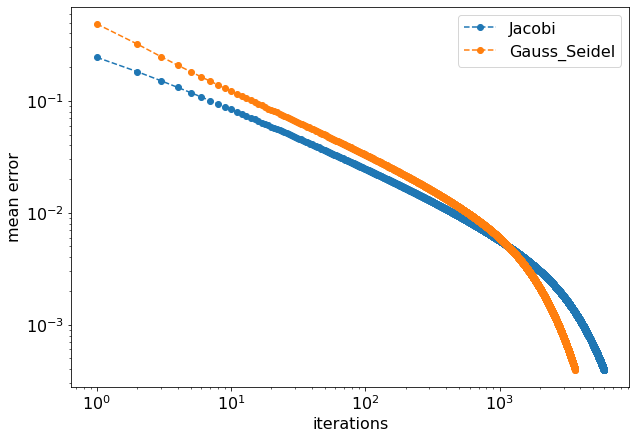

In [90]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.semilogy(np.arange(1, count_J1+1), mean_e_J1, 'o--',  label = 'Jacobi')
plt.semilogy(np.arange(1, count_GS+1), mean_e_GS,'o--', label = 'Gauss_Seidel')
# plt.semilogy()
plt.loglog()
plt.xlabel('iterations')
plt.ylabel('mean error')
plt.legend()
plt.savefig("fig1_JGS_mean.png")
files.download("fig1_JGS_mean.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

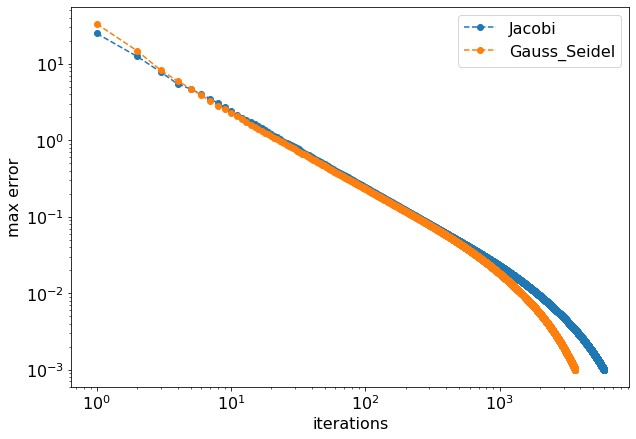

In [91]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(np.arange(1, count_J1+1), max_e_J1,'o--', label = 'Jacobi')
plt.plot(np.arange(1, count_GS+1), max_e_GS, 'o--',label = 'Gauss_Seidel')

plt.xlabel('iterations')
plt.ylabel('max error')
plt.loglog()
# plt.semilogy()
plt.legend()
plt.savefig("fig1_JGS_max.png")
files.download("fig1_JGS_max.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

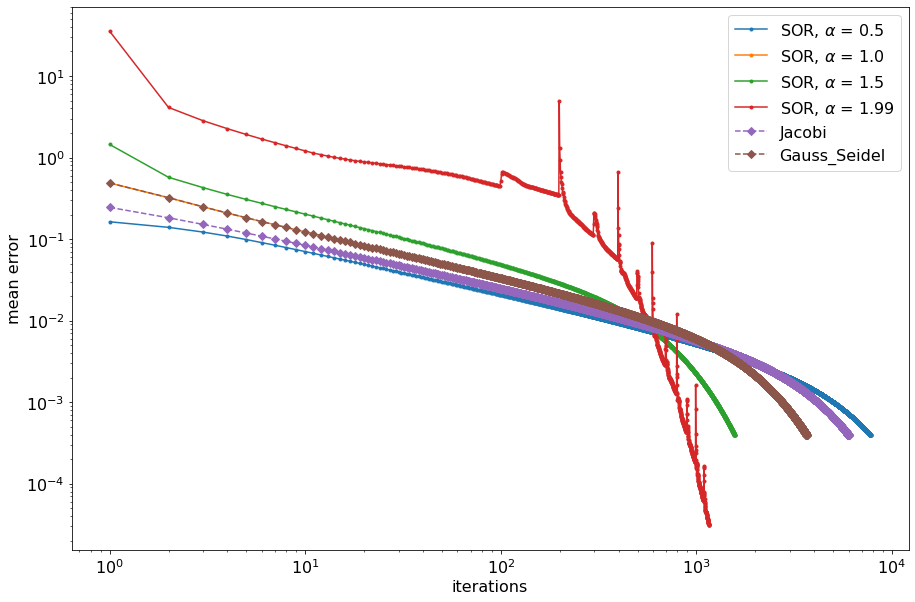

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in [0, 1, 3, 5]:
  iter_SOR = np.arange(1, count_SOR[i] + 1)
  plt.plot(iter_SOR, mean_e_SOR[i], '.-', label = r'SOR, $\alpha$ ' f'= {alpha[i]}')

plt.plot(np.arange(1, count_J1+1), mean_e_J1,'D--', label = 'Jacobi')
plt.plot(np.arange(1, count_GS+1), mean_e_GS, 'D--',label = 'Gauss_Seidel')

plt.loglog()
# plt.semilogy()
plt.xlabel('iterations')
plt.ylabel('mean error')
plt.legend()
plt.savefig("fig1_mean.png")
files.download("fig1_mean.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

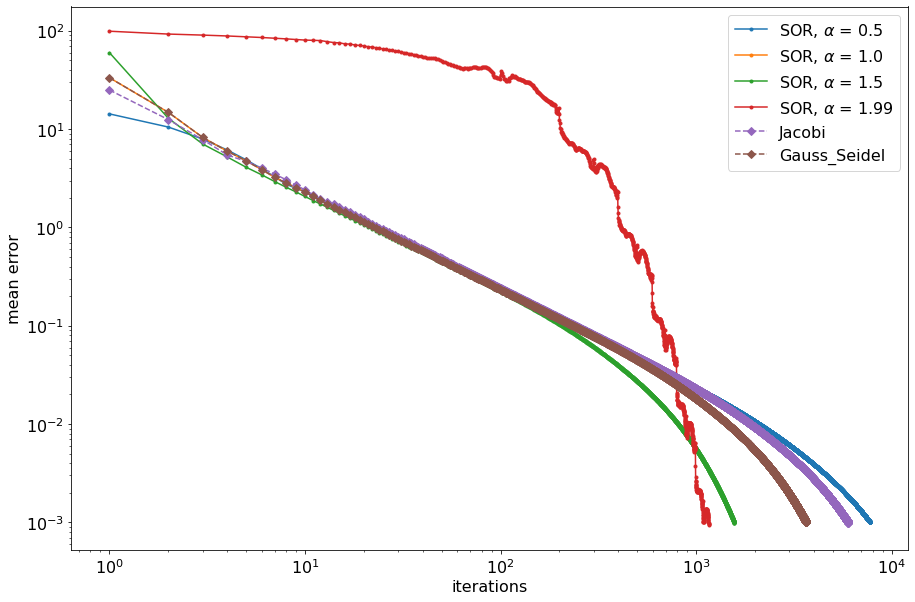

In [93]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in [0, 1, 3, 5]:
  iter_SOR = np.arange(1, count_SOR[i] + 1)
  plt.plot(iter_SOR, max_e_SOR[i], '.-', label = r'SOR, $\alpha$ ' f'= {alpha[i]}')

plt.plot(np.arange(1, count_J1+1), max_e_J1,'D--', label = 'Jacobi')
plt.plot(np.arange(1, count_GS+1), max_e_GS, 'D--',label = 'Gauss_Seidel')

plt.loglog()
# plt.semilogy()
plt.xlabel('iterations')
plt.ylabel('mean error')
plt.legend()
plt.savefig("fig1_max.png")
files.download("fig1_max.png")
plt.show()

In [51]:
alph = 2.1

In [52]:
V_SOR_2, count_SOR_2, mean_e_SOR_2, max_e_SOR_2 =  SOR(V, N_max, tol_max, alph, k)

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-5-c0d238e2ccb5>:112: RuntimeWarning: overflow encountered in double_scalars
  r =  0.25 * (p[i+1,j] + p[i-1,j] + p[i,j+1] + p[i,j-1]) - p[i, j]
<ipython-input-5-c0d238e2ccb5>:112: RuntimeWarning: invalid value encountered in double_scalars
  r =  0.25 * (p[i+1,j] + p[i-1,j] + p[i,j+1] + p[i,j-1]) - p[i, j]


In [ ]:
plt.plot(count_SOR_2, max_e_SOR_2, 'o--', label = r'max error, SOR, $\alpha$ ' f'= {alph}')
plt.plot(count_SOR_2, mean_e_SOR_2, 'o--', label = r'mean error, SOR, $\alpha$ ' f'= {alph}')

plt.loglog()
# plt.semilogy()
plt.legend()
plt.xlabel('iterations')
plt.ylabel('error')
plt.savefig("fig1_SOR_maxmean.png")
files.download("fig1_SOR_maxmean.png")

### **b)**
The solution of this problem can be written as an infinite series:
$$\phi(x, y) = \sum^\infty_{n = 1, 3, 5, ...} \frac{400}{n\pi}\sin \bigg(\frac{n \pi y}{L}\bigg)e^{-n \pi x}$$
Plot this solution for 1, 10, 100 and 1000 terms. Plot the difference between one of
the iterative solutions and the “infinite” series solution using 1000 terms. Discuss
your results. (4 points)

In [73]:
def phi_theory(x, y, L, n):
  sum = np.zeros(np.shape(x))
  # if n == 1:
  #   return 400/(n*np.pi)*np.sin(n*np.pi*y/L)*np.exp(-n*np.pi*x)
  # else:
  for i in range(1, n+1, 2):
    if i<200:
      term =  400/(i*np.pi)*np.sin(i*np.pi*y/L)*np.sinh(i*np.pi*(x-L)/L)/np.sinh(-i*np.pi)
    else:
      term =  400/(i*np.pi)*np.sin(i*np.pi*y/L)*np.exp(-i*np.pi*x)
    sum = sum + term
  return sum

In [60]:
nn = np.array([1, 10, 100, 1000])

In [74]:
x = np.linspace(0, L, N_max)
y = np.linspace(0, L, N_max)

X, Y = np.meshgrid(x, y)
Z1 = phi_theory(X, Y, L, nn[0])

Z2 = phi_theory(X, Y, L, nn[1])

Z3 = phi_theory(X, Y, L, nn[2])

Z4 = phi_theory(X, Y, L, nn[3])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

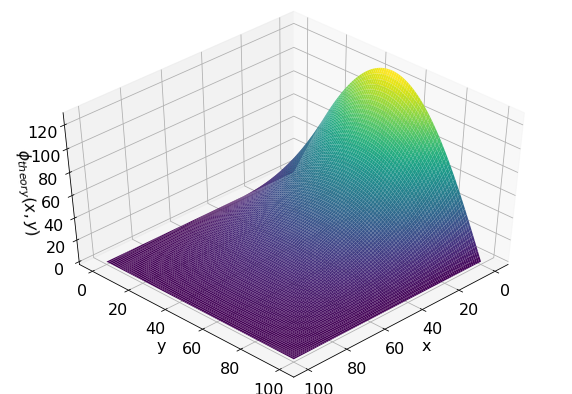

In [69]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis',   edgecolor='none')
#ax.plot_surface(Y,X,potential,shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi_{theory}(x, y)$');
ax.view_init(45, 45)
# ax.set_legend()
plt.savefig("fig1_1.png")
files.download("fig1_1.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

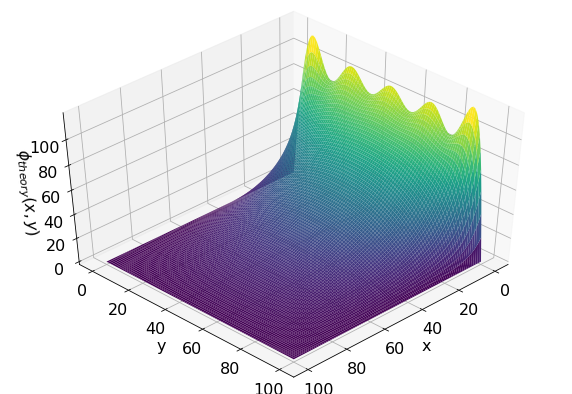

In [70]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,
                cmap='viridis',   edgecolor='none')
#ax.plot_surface(Y,X,potential,shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi_{theory}(x, y)$');
ax.view_init(45, 45)
# ax.set_legend()
plt.savefig("fig1_10.png")
files.download("fig1_10.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

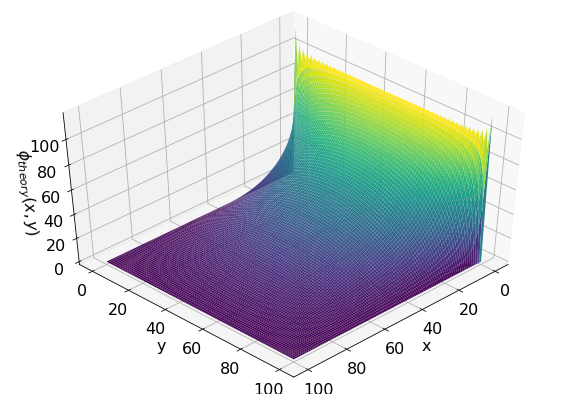

In [71]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z3, rstride=1, cstride=1,
                cmap='viridis',   edgecolor='none')
#ax.plot_surface(Y,X,potential,shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi_{theory}(x, y)$');
ax.view_init(45, 45)
# ax.set_legend()
plt.savefig("fig1_100.png")
files.download("fig1_100.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

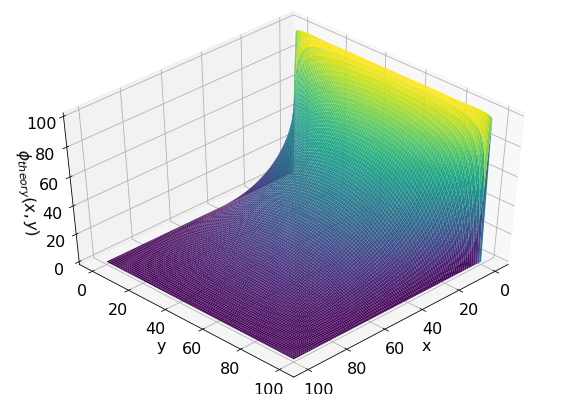

In [75]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z4, rstride=1, cstride=1,
                cmap='viridis',   edgecolor='none')
#ax.plot_surface(Y,X,potential,shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi_{theory}(x, y)$');
ax.view_init(45, 45)
# ax.set_legend()
plt.savefig("fig1_1000.png")
files.download("fig1_1000.png")
plt.show()

In [ ]:
# graphSolution(Z, x, y, zaxis = '$\phi_{theory}(x, y)$')

In [88]:
Z4[0, 0]

0.0

In [89]:

V_GS[0, 0]

100.0

<ipython-input-101-0d97ee055e33>:1: RuntimeWarning: invalid value encountered in true_divide
  graphSolution(np.abs(V_GS- Z4)/np.abs(Z4), x, y, zaxis = '$|(\phi_{exp}(x, y) - \phi_{theory}(x, y))/\phi_{theory}(x, y)|$')
<ipython-input-15-ceb424c0b435>:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax0.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis',   edgecolor='none')#linewidth=0, antialiased=False, facecolors=illuminated_surface)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

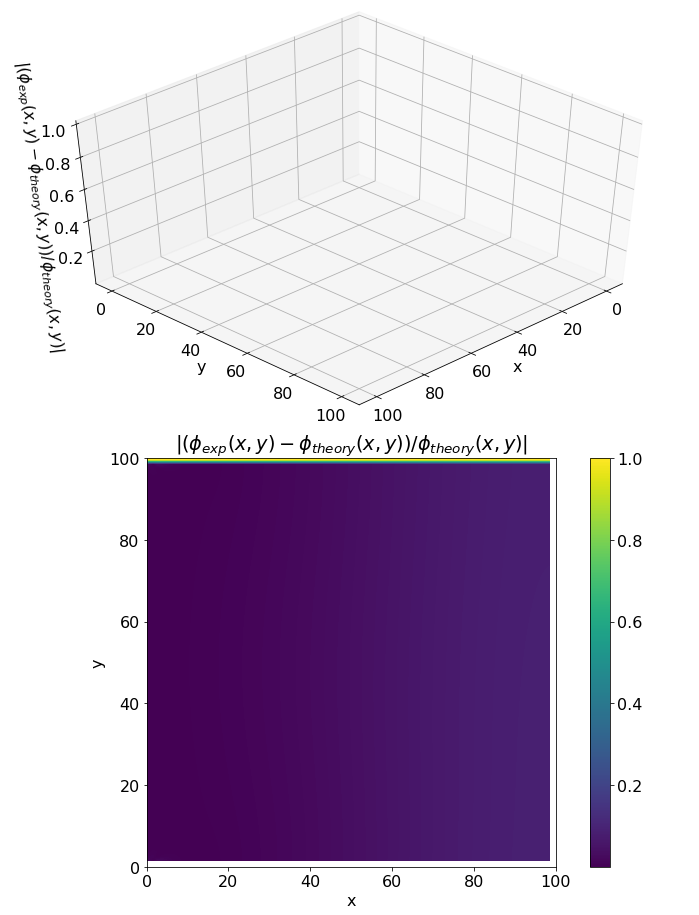

In [101]:
graphSolution(np.abs(V_GS- Z4)/np.abs(Z4), x, y, zaxis = '$|(\phi_{exp}(x, y) - \phi_{theory}(x, y))/\phi_{theory}(x, y)|$')

In [76]:
np.max(Z4)

100.21659074132671

## **2 Diffusion**
Consider a metallic rod of a finite length $L$ and a small radius, which is isolated at its side, but not at its ends, where it is placed in contact with ice water at $0^{\circ}$ C.

To simulate the temperature flow, we will need to solve the diffusion PDE
$$\frac{\partial T(x, t)}{\partial t} = \frac{K}{C \rho}\frac{\partial^2 T(x, t)}{\partial x^2} $$ 
with the thermal conductivity $K$, the heat capacity $C$ and the density $\rho$. Use $L = 1$, $K = 210$, $C = 900$ and $\rho = 2700$, and, if not otherwise specified, $\Delta x = 0.01$ and $\Delta t = 0.1$ with a number of time steps $N_t = 10000$. The rod’s temperature distribution is initially set to $T(x, 0) = \sin(\pi x/L)$.

### **a)** 
Simulate the system using the FTCS algorithm and plot $T(x, t)$. (8 points)

### **b)**
The analytical solution is given by
 $$T_{exact}(x, t) = \sin \bigg(\frac{\pi x}{L}\bigg)e^{-\frac{\pi^2 K t}{L^2 C \rho}}$$
With that, we can define our simulation error as
 $$\epsilon(t)= \frac{1}{N_x}\sum^{N_x-1}_{j =1} |T(j\Delta x, t) - T_{exact}(j \Delta x, t)|$$
where $N_x = L/\Delta x$. Study the behaviour of $\epsilon (t = 100)$ varying $\Delta t$ between 0.001 and 0.7 while keeping $\Delta x$ fixed. What happens? Explain your finding. (4 points)

### **c)**
Now, implement the implicit Euler backward, the Crank–Nicolson and Dufort–
Frankel algorithms and repeat the analysis for $\epsilon (t = 100)$ for all of them. Discuss your results comparing the four algorithms, in particular with respect to the scaling behaviour of the error with $\Delta t$. (4 points)

It might be challenging to find the expected Δt scaling of the different methods in 2c), because the Δx induced error appears to be dominating with only 100 steps in Δx. You should however be able to see the expected stability problem for the Euler forward algorithm in 2b).

We will try to identify a region where the Δt scaling can be clearly seen, so we can discuss it in the tutorials. For the grading of the project, it is sufficient to plot the results for 2c) with the parameters/ranges as they are specified on the sheet and to discuss the results as they are, even if they might not be entirely conclusive.